In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from statsmodels.stats.outliers_influence import variance_inflation_factor


In [41]:
file=pd.read_csv("C:\\Users\\Lenovo\\OneDrive\\Desktop\\eda_data.csv")
file

,brand,model,base_color,processor,screen_size,ROM,RAM,display_size,num_rear_camera,num_front_camera,battery_capacity,ratings,num_of_ratings,sales_price,discount_percent,sales
0,Apple,iPhone SE,Black,Water,Very Small,64,4,4.7,1,1,1800,4.5,38645,32999,0.17,127.52
1,Apple,iPhone 12 Mini,Red,Ceramic,Small,64,6,5.4,2,1,2815,4.5,244,57149,0.04,1.39
2,Apple,iPhone SE,Red,Water,Very Small,64,4,4.7,1,1,1800,4.5,38645,32999,0.17,127.52
3,Apple,iPhone XR,Others,iOS,Medium,64,4,6.1,1,1,2942,4.6,5366,42999,0.10,23.07
4,Apple,iPhone 12,Red,Ceramic,Medium,128,6,6.1,2,1,2815,4.6,745,69149,0.02,5.15
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
425,Xiaomi,Redmi 6 Pro,Black,Qualcomm,Small,32,4,5.8,2,1,4000,4.3,1870,7999,0.30,1.50
426,Xiaomi,Redmi 6 Pro,Red,Qualcomm,Small,64,4,5.8,2,1,4000,4.3,1783,9699,0.28,1.73
427,Xiaomi,Mi 11 Lite,Others,Qualcomm,Large,128,6,6.5,3,1,4250,4.2,1554,21999,0.12,3.42
428,Xiaomi,Redmi 8A Dual,Blue,Qualcomm,Medium,32,4,6.2,2,1,5000,4.2,8161,8299,0.07,6.77


In [42]:
file.describe()

,ROM,RAM,display_size,num_rear_camera,num_front_camera,battery_capacity,ratings,num_of_ratings,sales_price,discount_percent,sales
count,430.000000,430.000000,430.000000,430.000000,430.000000,430.000000,430.000000,430.000000,430.000000,430.000000,430.000000
mean,105.748837,5.769767,6.369767,2.904651,1.044186,4529.397674,4.339302,23567.944186,25433.234884,0.108000,29.752326
std,63.164064,1.847450,0.369549,0.952350,0.227280,986.907252,0.151494,56096.277784,22471.926588,0.073432,58.399588
min,8.000000,3.000000,4.700000,1.000000,1.000000,1800.000000,3.000000,4.000000,5742.000000,0.010000,0.000000
25%,64.000000,4.000000,6.300000,2.000000,1.000000,4000.000000,4.300000,745.000000,11999.000000,0.060000,1.640000
50%,128.000000,6.000000,6.500000,3.000000,1.000000,4500.000000,4.300000,5197.500000,16989.500000,0.090000,9.655000
75%,128.000000,6.000000,6.500000,4.000000,1.000000,5000.000000,4.400000,21089.250000,28999.000000,0.160000,29.717500
max,512.000000,12.000000,7.600000,4.000000,3.000000,7000.000000,4.600000,642373.000000,157999.000000,0.440000,550.190000


###  DATA VISUALISATION :

#### INFERING THE TARGETED COLUMN SALES_PRICE WITH RESPECTIVE TO ALL OTHER FACTORS

#### Brand 

In [43]:
file["brand"].value_counts()

Realme     138
Samsung    119
Xiaomi      61
Poco        56
Apple       56
Name: brand, dtype: int64

<AxesSubplot:xlabel='brand', ylabel='Count'>

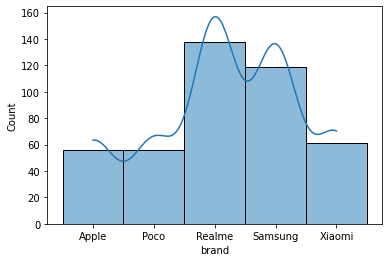

In [46]:
sns.histplot(file['brand'],kde=True)

<AxesSubplot:xlabel='model', ylabel='sales_price'>

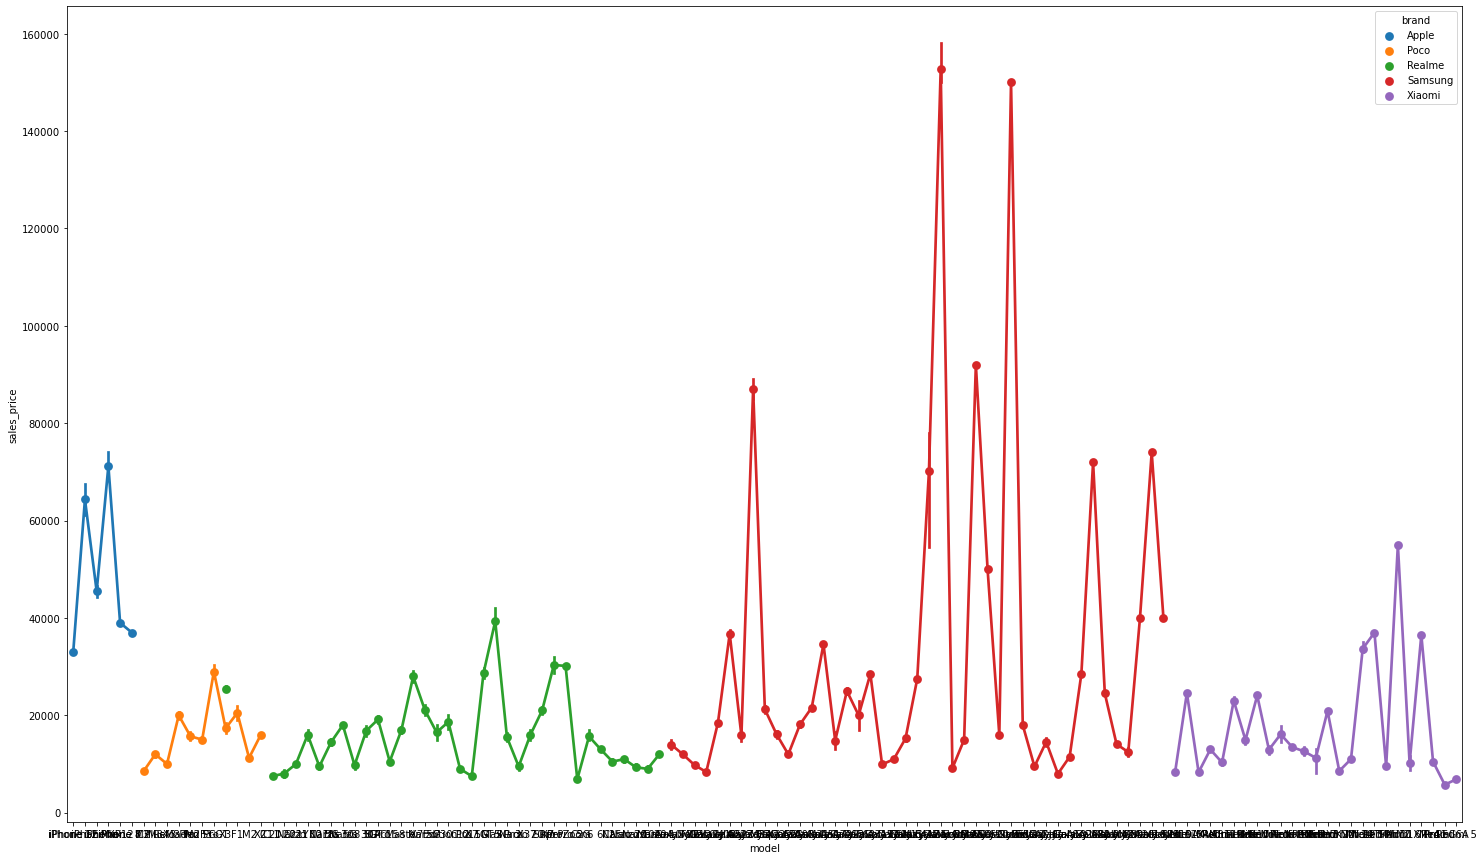

In [47]:
plt.figure(figsize = (25,15))
sns.pointplot(x='model',y='sales_price',hue='brand',data=file)

#### we can observe that samsung models are reason for high sales price 

<AxesSubplot:xlabel='ROM', ylabel='sales_price'>

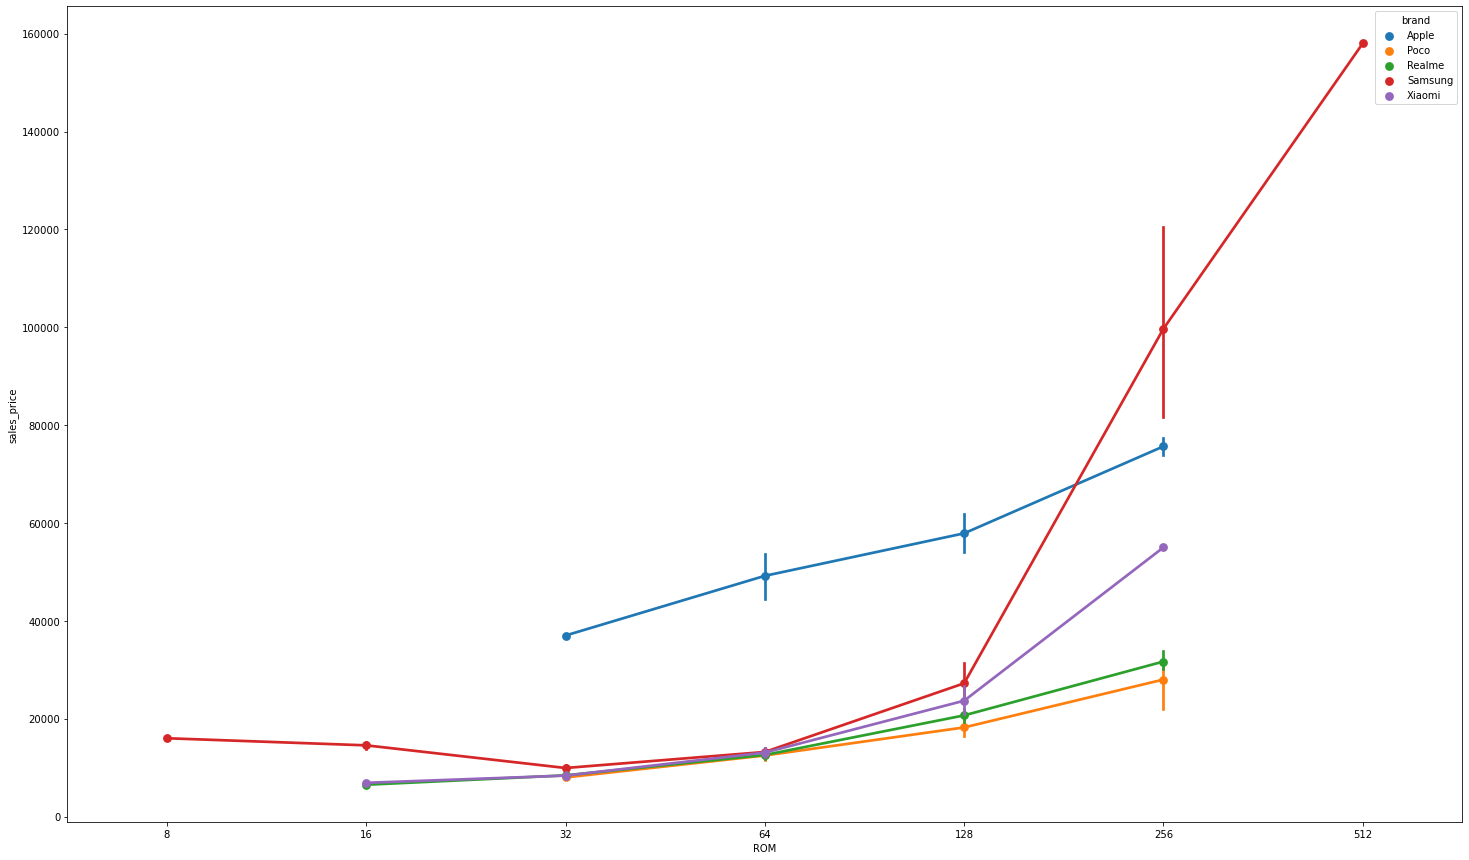

In [48]:
plt.figure(figsize = (25,15))
sns.pointplot(x='ROM',y='sales_price',hue='brand',data=file)

#### if the ROM is greater than 256 and the brand is samsung then there is a high chance of price being high 

In [49]:
file["RAM"].value_counts()

4     169
6     158
8      88
12     12
3       3
Name: RAM, dtype: int64

<AxesSubplot:xlabel='RAM', ylabel='sales_price'>

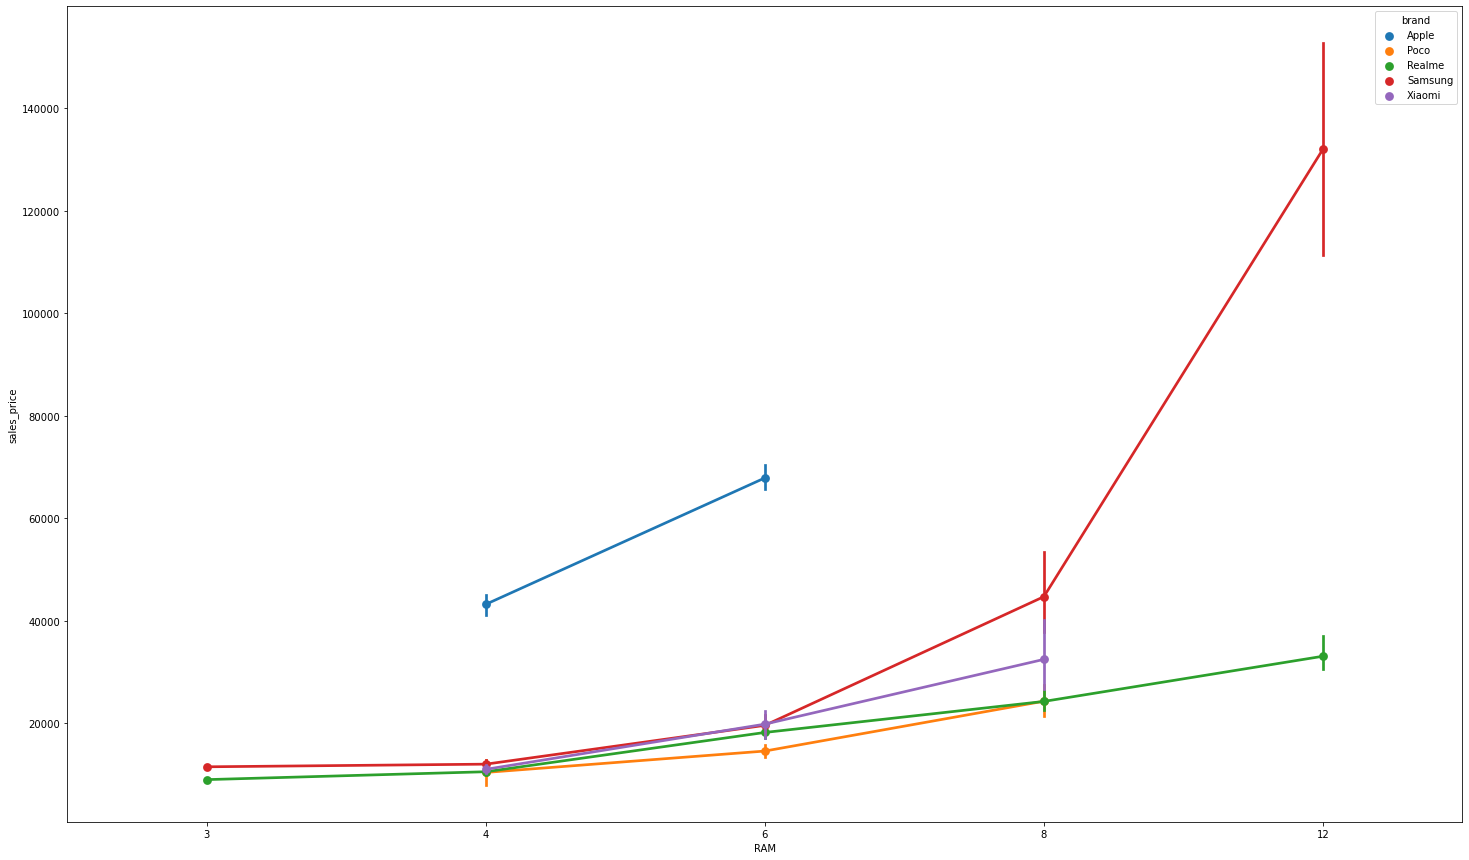

In [50]:
plt.figure(figsize = (25,15))
sns.pointplot(x='RAM',y='sales_price',hue='brand',data=file)

#### if the RAM is greater than 8 and the model is samsung then the chance of price being high is high 

In [51]:
file["base_color"].value_counts()

Blue      117
Black     112
White      44
Silver     32
Others     28
Green      24
Red        21
Gray       20
Yellow     11
Gold       11
Purple      5
Bronze      5
Name: base_color, dtype: int64

<AxesSubplot:xlabel='base_color', ylabel='sales_price'>

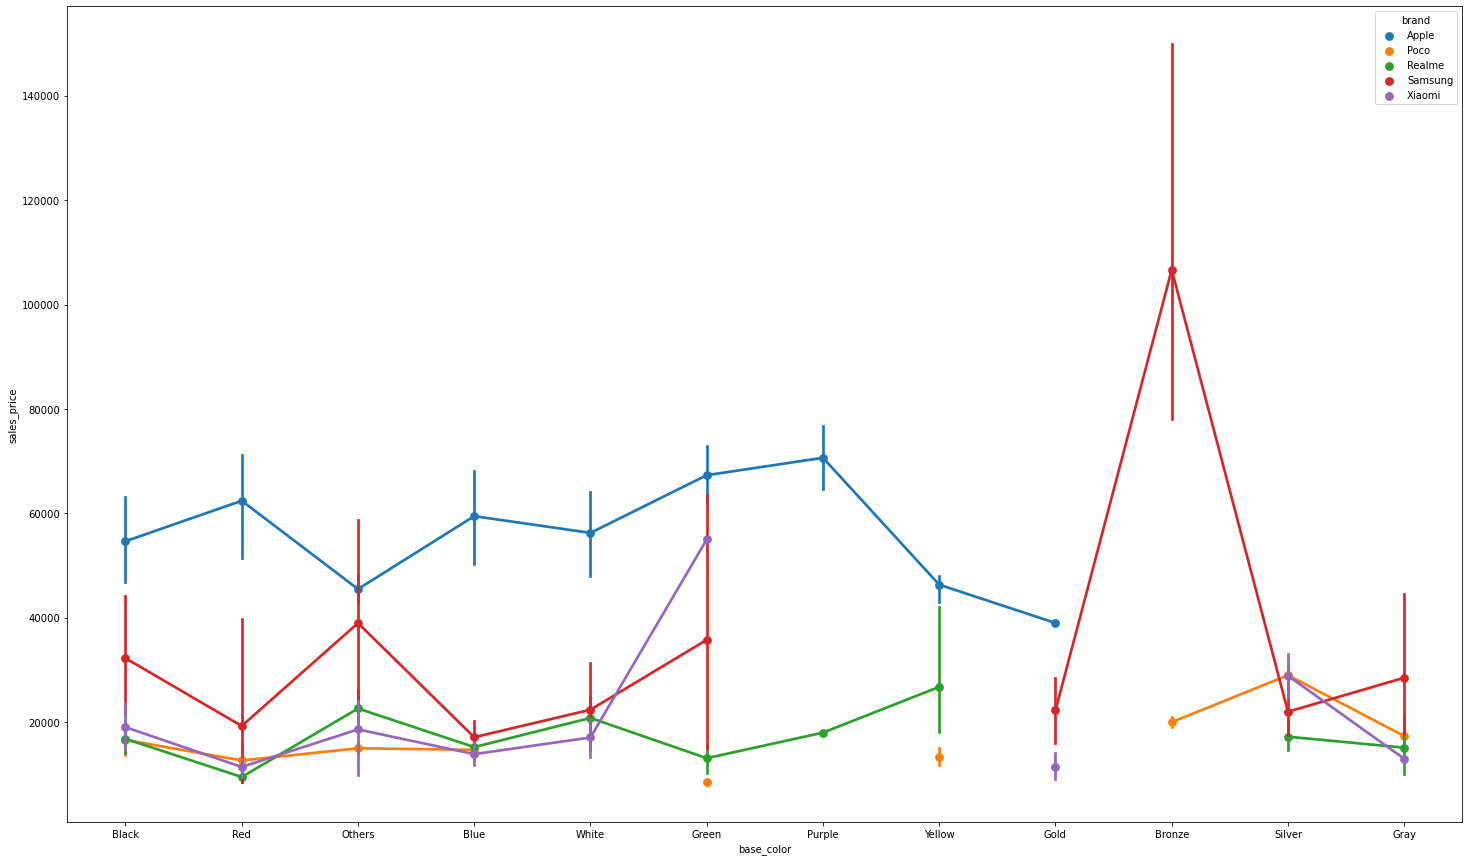

In [52]:
plt.figure(figsize = (25,15))
sns.pointplot(x='base_color',y='sales_price',hue='brand',data=file)

#### THE SAMSUNG BRAND HAVING THE COLOUR BRONZE IS HAVING HIGHEST PRICE 

<AxesSubplot:xlabel='processor', ylabel='sales_price'>

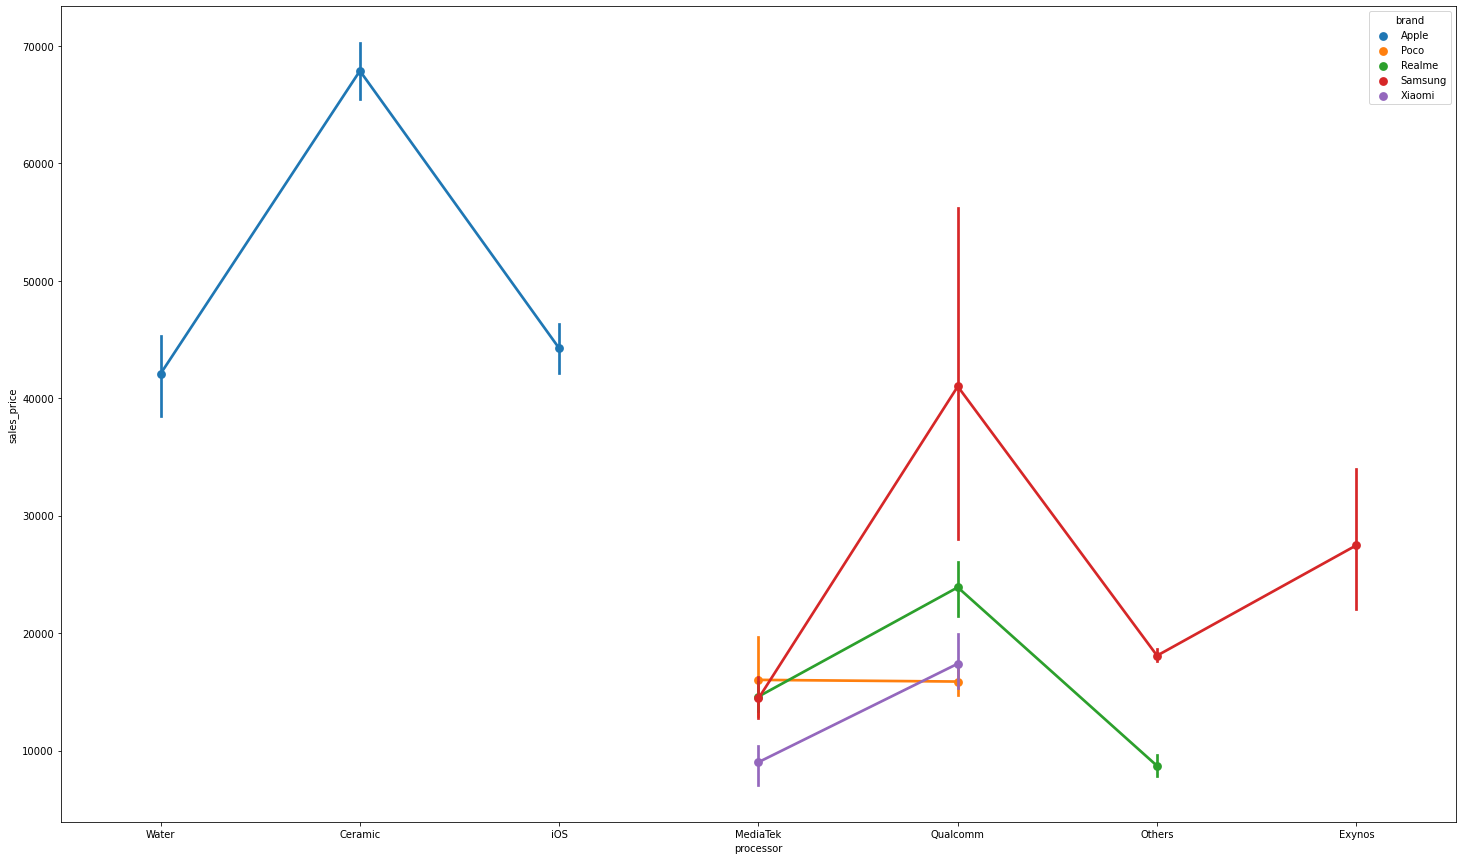

In [53]:
plt.figure(figsize = (25,15))
sns.pointplot(x='processor',y='sales_price',hue='brand',data=file)

In [14]:
file["processor"].value_counts()

Qualcomm    168
MediaTek    144
Exynos       53
Ceramic      33
iOS          12
Water        11
Others        9
Name: processor, dtype: int64

#### since there are no processors named water and ciremic, there is an unwanted data, so we are going to change the processors to iOS 

In [54]:
#map={'water':'iOS','Ceramic':'iOS','iOS':'iOS','Media Tek processor':'Media Tek processor}
file['processor'].replace({'Water':'iOS','Ceramic':'iOS'},inplace=True)
file

,brand,model,base_color,processor,screen_size,ROM,RAM,display_size,num_rear_camera,num_front_camera,battery_capacity,ratings,num_of_ratings,sales_price,discount_percent,sales
0,Apple,iPhone SE,Black,iOS,Very Small,64,4,4.7,1,1,1800,4.5,38645,32999,0.17,127.52
1,Apple,iPhone 12 Mini,Red,iOS,Small,64,6,5.4,2,1,2815,4.5,244,57149,0.04,1.39
2,Apple,iPhone SE,Red,iOS,Very Small,64,4,4.7,1,1,1800,4.5,38645,32999,0.17,127.52
3,Apple,iPhone XR,Others,iOS,Medium,64,4,6.1,1,1,2942,4.6,5366,42999,0.10,23.07
4,Apple,iPhone 12,Red,iOS,Medium,128,6,6.1,2,1,2815,4.6,745,69149,0.02,5.15
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
425,Xiaomi,Redmi 6 Pro,Black,Qualcomm,Small,32,4,5.8,2,1,4000,4.3,1870,7999,0.30,1.50
426,Xiaomi,Redmi 6 Pro,Red,Qualcomm,Small,64,4,5.8,2,1,4000,4.3,1783,9699,0.28,1.73
427,Xiaomi,Mi 11 Lite,Others,Qualcomm,Large,128,6,6.5,3,1,4250,4.2,1554,21999,0.12,3.42
428,Xiaomi,Redmi 8A Dual,Blue,Qualcomm,Medium,32,4,6.2,2,1,5000,4.2,8161,8299,0.07,6.77


In [55]:
file['processor'].unique()

array(['iOS', 'MediaTek', 'Qualcomm', 'Others', 'Exynos'], dtype=object)

<AxesSubplot:xlabel='processor', ylabel='sales_price'>

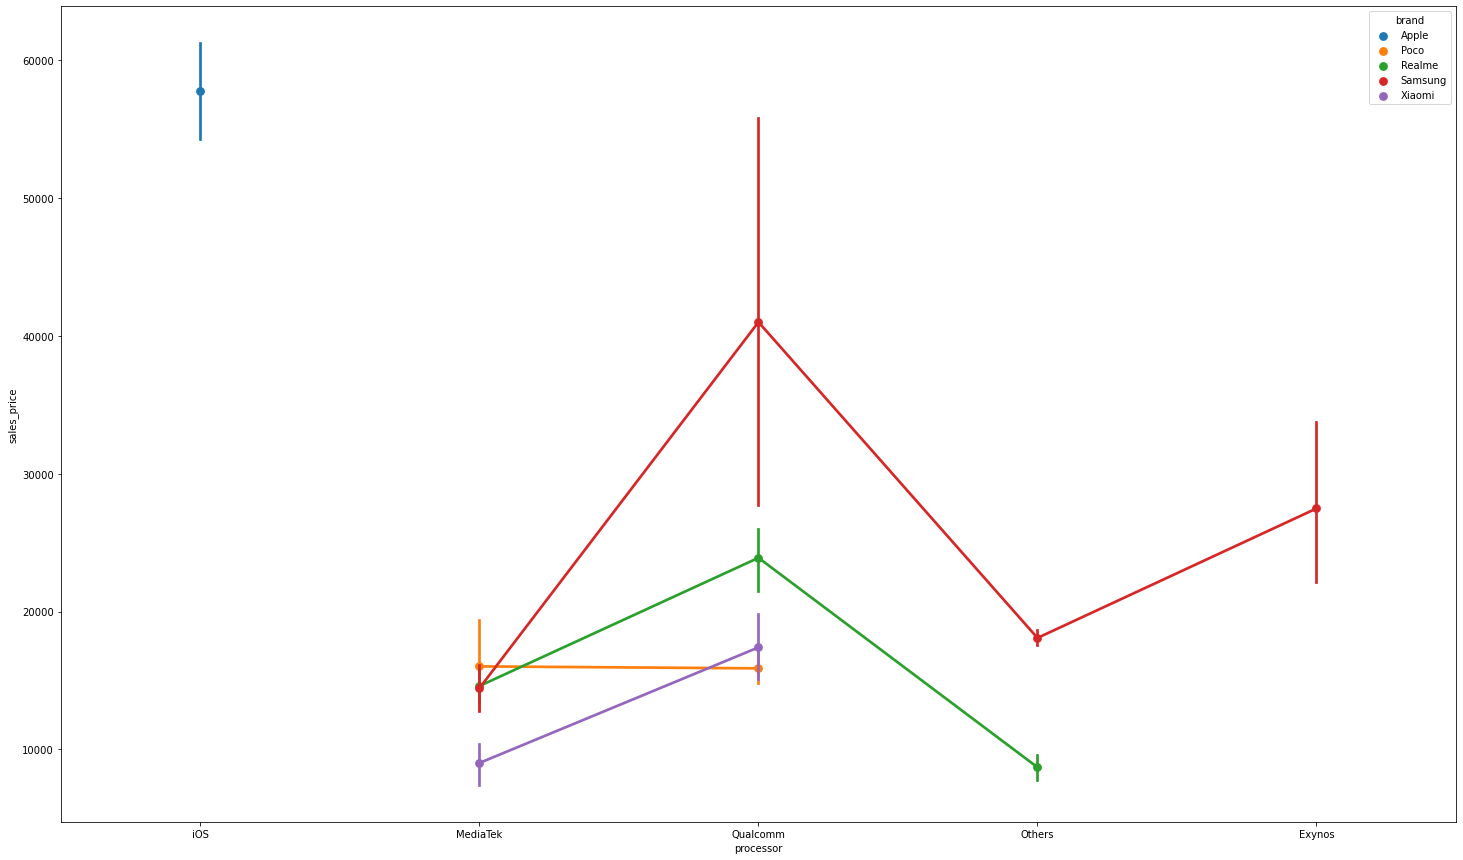

In [56]:
plt.figure(figsize = (25,15))
sns.pointplot(x='processor',y='sales_price',hue='brand',data=file)

#### THE APPLE PROCESSOR IS HAVING THE HIGH PRICE 

<AxesSubplot:xlabel='display_size', ylabel='sales_price'>

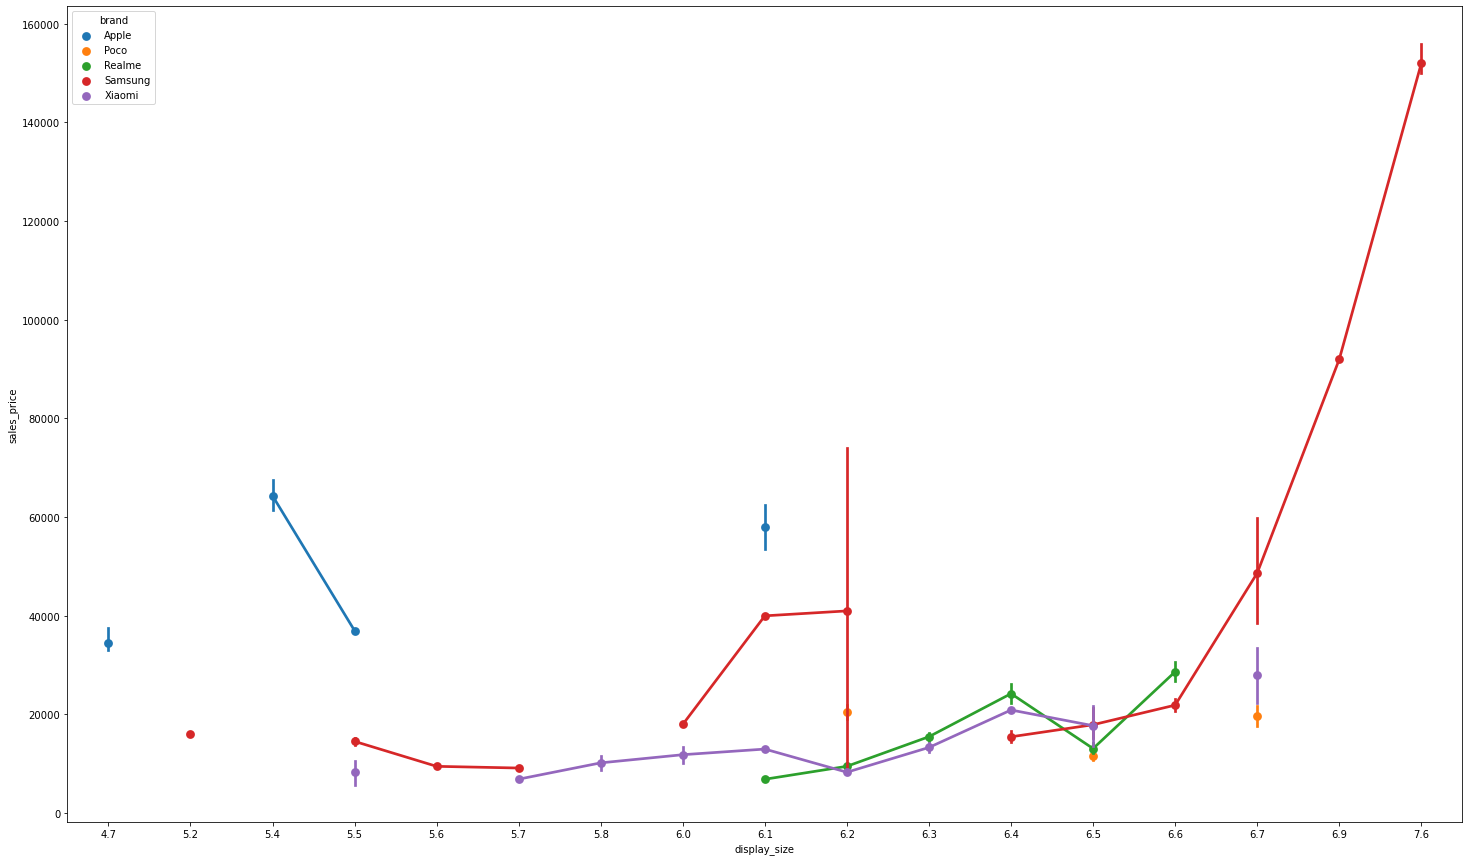

In [57]:
plt.figure(figsize = (25,15))
sns.pointplot(x='display_size',y='sales_price',hue='brand',data=file)

#### THE SAMSUNG MODEL HAVING LARGER DISPLAY IS EFFECTING THE SALES_PRICE 

<AxesSubplot:xlabel='num_rear_camera', ylabel='sales_price'>

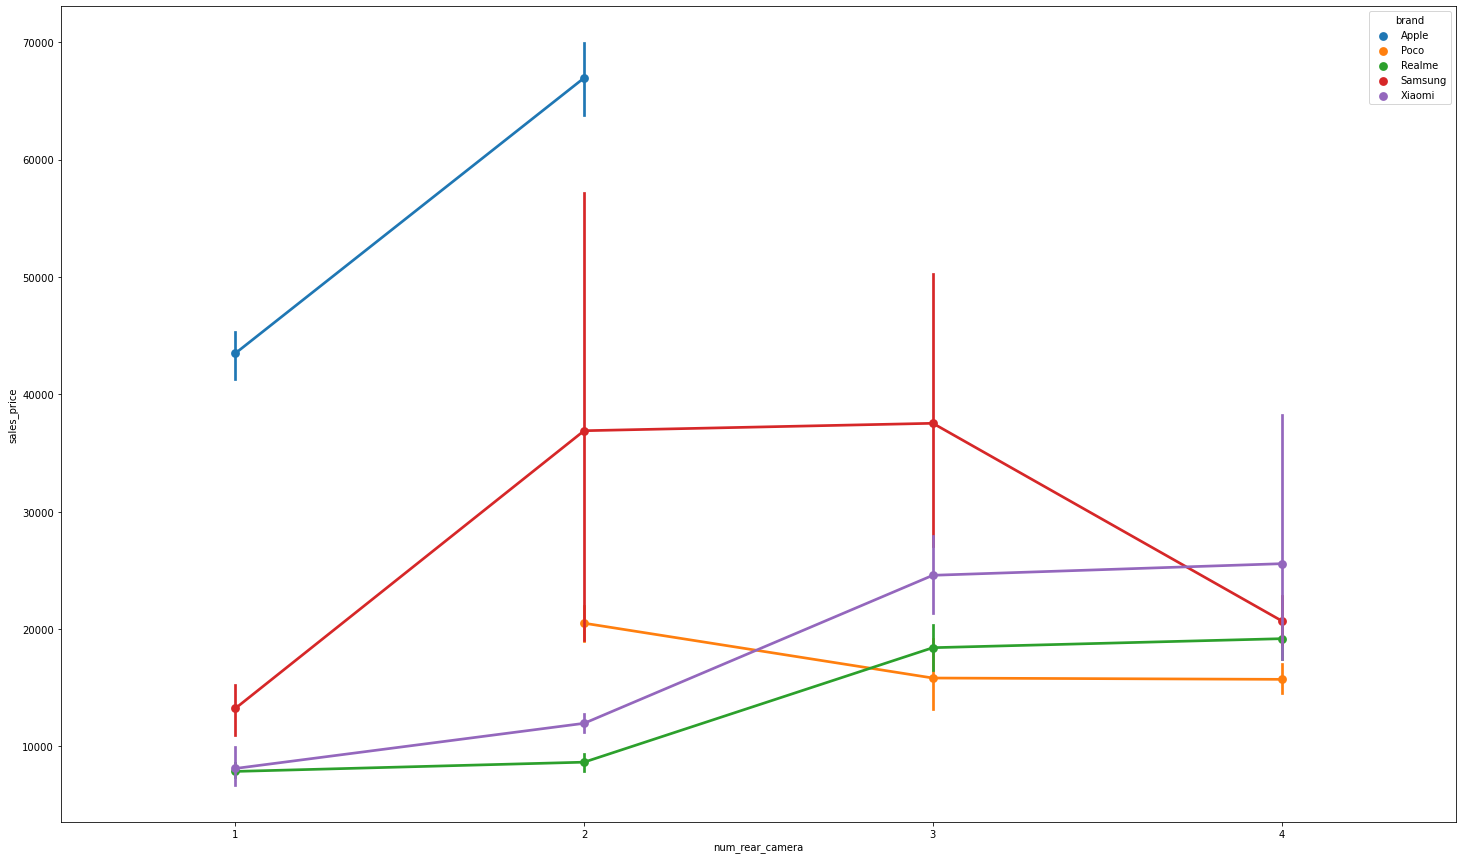

In [59]:
plt.figure(figsize = (25,15))
sns.pointplot(x='num_rear_camera',y='sales_price',hue='brand',data=file)

#### THE APPLE PHONE WITH TWO REAR CAMERAS EFFECTS THE SALES_PRICE 

# INFERING THE DATA BY GROUPING IT TO: CATEGORICAL AND NUMERICAL_FEATUERS 

In [60]:
import warnings
warnings.filterwarnings('ignore')
numerical_features=file.select_dtypes(include=np.number)
categorical_features=file.select_dtypes(include=np.object)
print("numerical_features: ", numerical_features.shape, numerical_features.columns)
print("categorical_feauters: ", categorical_features.shape, categorical_features.columns)

numerical_features:  (430, 11) Index(['ROM', 'RAM', 'display_size', 'num_rear_camera', 'num_front_camera',
       'battery_capacity', 'ratings', 'num_of_ratings', 'sales_price',
       'discount_percent', 'sales'],
      dtype='object')
categorical_feauters:  (430, 5) Index(['brand', 'model', 'base_color', 'processor', 'screen_size'], dtype='object')


In [61]:
numerical_features.iloc[:,:11].describe()
## iloc is used to coustomized set of data

,ROM,RAM,display_size,num_rear_camera,num_front_camera,battery_capacity,ratings,num_of_ratings,sales_price,discount_percent,sales
count,430.000000,430.000000,430.000000,430.000000,430.000000,430.000000,430.000000,430.000000,430.000000,430.000000,430.000000
mean,105.748837,5.769767,6.369767,2.904651,1.044186,4529.397674,4.339302,23567.944186,25433.234884,0.108000,29.752326
std,63.164064,1.847450,0.369549,0.952350,0.227280,986.907252,0.151494,56096.277784,22471.926588,0.073432,58.399588
min,8.000000,3.000000,4.700000,1.000000,1.000000,1800.000000,3.000000,4.000000,5742.000000,0.010000,0.000000
25%,64.000000,4.000000,6.300000,2.000000,1.000000,4000.000000,4.300000,745.000000,11999.000000,0.060000,1.640000
50%,128.000000,6.000000,6.500000,3.000000,1.000000,4500.000000,4.300000,5197.500000,16989.500000,0.090000,9.655000
75%,128.000000,6.000000,6.500000,4.000000,1.000000,5000.000000,4.400000,21089.250000,28999.000000,0.160000,29.717500
max,512.000000,12.000000,7.600000,4.000000,3.000000,7000.000000,4.600000,642373.000000,157999.000000,0.440000,550.190000


### SKEWNESS AND KURTOSIS 

In [62]:
pd.DataFrame({"skewness":file.skew(),"kurtosis":file.kurt()})

,skewness,kurtosis
ROM,1.495005,4.281648
RAM,1.069492,1.461831
display_size,-1.553612,5.152325
num_rear_camera,-0.459102,-0.759097
num_front_camera,5.590313,33.995688
battery_capacity,-0.283895,0.056628
ratings,-1.732396,14.043025
num_of_ratings,5.850073,47.930201
sales_price,2.595228,8.980504
discount_percent,1.301590,2.269150


#### If skewness is less than −1 or greater than +1, the distribution is highly skewed. If skewness is between −1 and −½ or between +½ and +1, the distribution is moderately skewed. If skewness is between −½ and +½, the distribution is approximately symmetric 

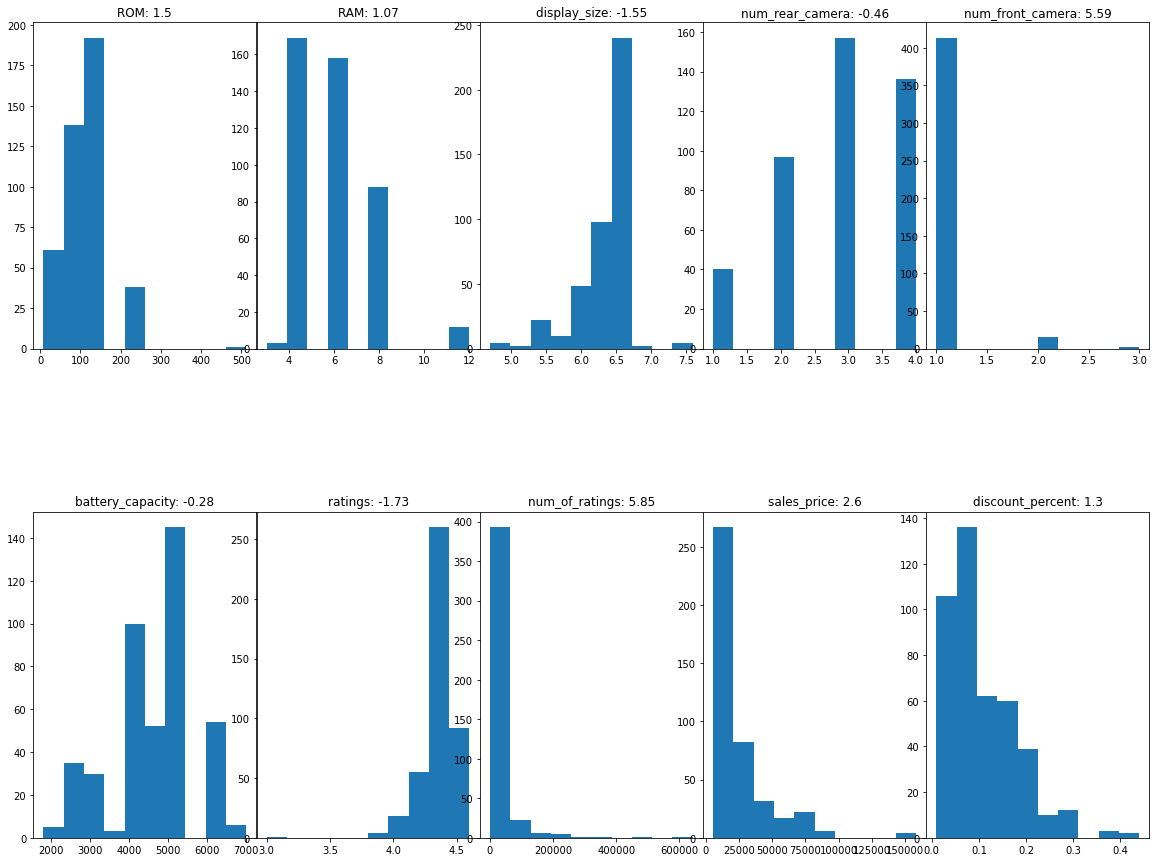

In [63]:
fig, axs = plt.subplots(2,5, figsize=(20, 15), facecolor='w', edgecolor='k')
fig.subplots_adjust(hspace = .5, wspace=.001)
axs = axs.ravel()

for i,j in zip([i for i in numerical_features.columns.to_list()[0:] if len(i) >0],range(10)):
    axs[j].hist(numerical_features[i])
    axs[j].set_title(i+': '+str(np.round(numerical_features[i].skew(),2)))
## ravel is used for excluding comments..



#### ROM: left skewed RAM: it can be considered as categorical feautre display_size: right skewed
#### num_rear_camera: it can be considered as categorical feautre
#### num_front_camera: it can be considered as categorical feautre
#### battery_capacity: it is highly fluctuating
#### ratings: right skewed
#### num_of_ratings:left skewed sales_price: left skewed discount_percent: left skewed sales: left skewed
###  Box-plot

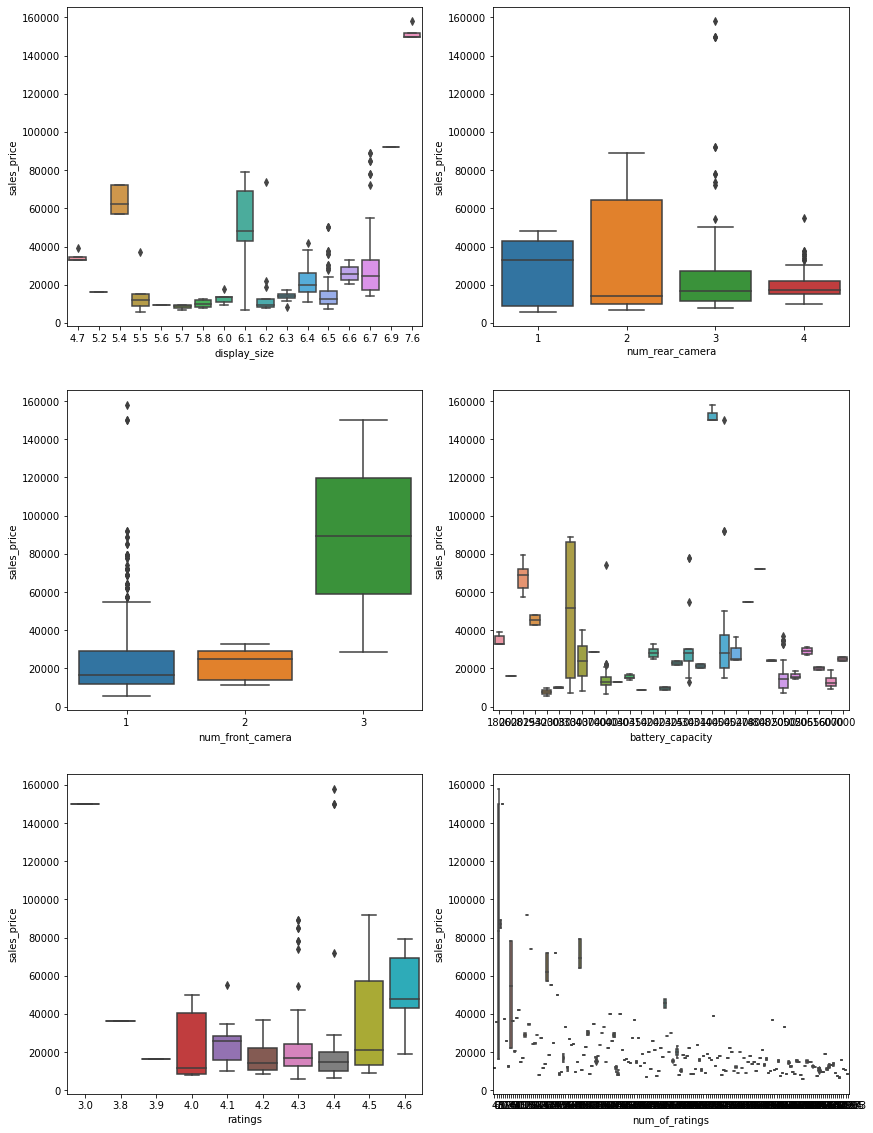

In [64]:
fig, ((ax1, ax2), (ax3, ax4), (ax5, ax6)) = plt.subplots(nrows=3, ncols=2, figsize=(14,20))
AX = [ax1, ax2, ax3, ax4, ax5, ax6]
for i,j in zip([i for i in numerical_features.columns.to_list()[1:8] if len(i)>3],AX):
    sns.boxplot(x=i,y='sales_price',data=numerical_features,ax=j)



### CORRELATION HEAT_MAP 

<AxesSubplot:>

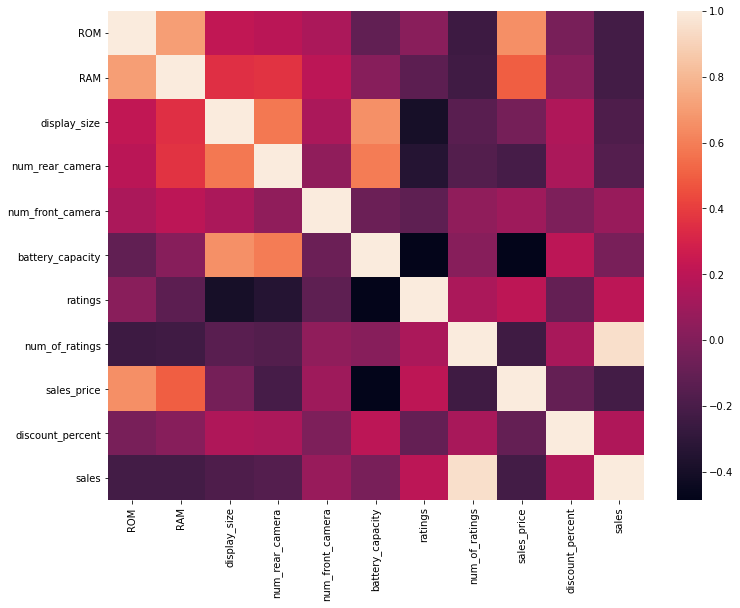

In [65]:
f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(numerical_features.corr())

### VARIANCE INFLATION FACTOR 

In [66]:
vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(numerical_features.values, i) for i in range(numerical_features.shape[1])]
vif["features"] = numerical_features.columns
vif

,VIF Factor,features
0,10.615427,ROM
1,27.309935,RAM
2,618.995749,display_size
3,22.128355,num_rear_camera
4,25.482237,num_front_camera
5,78.165758,battery_capacity
6,288.406733,ratings
7,13.254153,num_of_ratings
8,6.826785,sales_price
9,3.460549,discount_percent


#### HERE WE HAVE HIGH MULTI CORELATION BETWEEN DISPLAY SIZE AND RATINGS SO WE CAN NEGLECT EITHER ANYONE OF THEM 

## CATEGORICAL FEATURES

#### DATA INTEGRITY AND DATA CLEANING FOR CATEGORICAL FEATURES 

In [67]:
categorical_features.shape, categorical_features.columns

((430, 5),
 Index(['brand', 'model', 'base_color', 'processor', 'screen_size'], dtype='object'))

In [68]:
for i in categorical_features.columns.to_list():
    print("Total unique values for",i,len(categorical_features[i].unique()))
    print("Value Counts for",i,'\n',categorical_features[i].value_counts(),'\n')

Total unique values for brand 5
Value Counts for brand 
 Realme     138
Samsung    119
Xiaomi      61
Poco        56
Apple       56
Name: brand, dtype: int64 

Total unique values for model 119
Value Counts for model 
 iPhone XR         18
iPhone 12         17
iPhone 12 Mini    16
X3                 9
M2 Pro             9
                  ..
Redmi Note 5       1
Mi 10              1
Galaxy A22         1
Galaxy Fold 2      1
Galaxy S21         1
Name: model, Length: 119, dtype: int64 

Total unique values for base_color 12
Value Counts for base_color 
 Blue      117
Black     112
White      44
Silver     32
Others     28
Green      24
Red        21
Gray       20
Yellow     11
Gold       11
Purple      5
Bronze      5
Name: base_color, dtype: int64 

Total unique values for processor 5
Value Counts for processor 
 Qualcomm    168
MediaTek    144
iOS          56
Exynos       53
Others        9
Name: processor, dtype: int64 

Total unique values for screen_size 5
Value Counts for screen_s

In [69]:
file.head()

,brand,model,base_color,processor,screen_size,ROM,RAM,display_size,num_rear_camera,num_front_camera,battery_capacity,ratings,num_of_ratings,sales_price,discount_percent,sales
0,Apple,iPhone SE,Black,iOS,Very Small,64,4,4.7,1,1,1800,4.5,38645,32999,0.17,127.52
1,Apple,iPhone 12 Mini,Red,iOS,Small,64,6,5.4,2,1,2815,4.5,244,57149,0.04,1.39
2,Apple,iPhone SE,Red,iOS,Very Small,64,4,4.7,1,1,1800,4.5,38645,32999,0.17,127.52
3,Apple,iPhone XR,Others,iOS,Medium,64,4,6.1,1,1,2942,4.6,5366,42999,0.10,23.07
4,Apple,iPhone 12,Red,iOS,Medium,128,6,6.1,2,1,2815,4.6,745,69149,0.02,5.15


In [70]:
#map={'water':'iOS','Ceramic':'iOS','iOS':'iOS','Media Tek processor':'Media Tek processor}
file['processor'].replace({'Water':'iOS','Ceramic':'iOS'},inplace=True)
from sklearn.preprocessing import LabelEncoder
cols=['brand','model','base_color','screen_size','processor']
for i in cols:
    le=LabelEncoder()
    file[i]=le.fit_transform(file[i])

In [71]:
file.head().append(file.tail())

,brand,model,base_color,processor,screen_size,ROM,RAM,display_size,num_rear_camera,num_front_camera,battery_capacity,ratings,num_of_ratings,sales_price,discount_percent,sales
0,0,117,0,4,4,64,4,4.7,1,1,1800,4.5,38645,32999,0.17,127.52
1,0,114,8,4,2,64,6,5.4,2,1,2815,4.5,244,57149,0.04,1.39
2,0,117,8,4,4,64,4,4.7,1,1,1800,4.5,38645,32999,0.17,127.52
3,0,118,6,4,1,64,4,6.1,1,1,2942,4.6,5366,42999,0.10,23.07
4,0,113,8,4,1,128,6,6.1,2,1,2815,4.6,745,69149,0.02,5.15
425,4,91,0,3,2,32,4,5.8,2,1,4000,4.3,1870,7999,0.30,1.50
426,4,91,8,3,2,64,4,5.8,2,1,4000,4.3,1783,9699,0.28,1.73
427,4,76,6,3,0,128,6,6.5,3,1,4250,4.2,1554,21999,0.12,3.42
428,4,93,1,3,1,32,4,6.2,2,1,5000,4.2,8161,8299,0.07,6.77
429,4,91,1,3,2,32,4,5.8,2,1,4000,4.3,1870,8190,0.36,1.53


In [72]:
print(file['brand'].unique())
print(file["base_color"].unique())

[0 1 2 3 4]
[ 0  8  6  1 10  5  7 11  3  2  9  4]


#### SPLITTING AND CREATING THE TEST TRAIN MODEL 

In [73]:
X=file.drop(['sales_price'],axis=1)
y=file['sales_price']
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

In [74]:
from sklearn.linear_model import LinearRegression
lr=LinearRegression()
lr.fit(X_train,y_train)

LinearRegression()

In [75]:
import numpy
from sklearn.metrics import mean_squared_error
print('Error is : ',np.sqrt(mean_squared_error(y_test,lr.predict(X_test))))

Error is :  11934.645127991762


<AxesSubplot:xlabel='sales_price', ylabel='Density'>

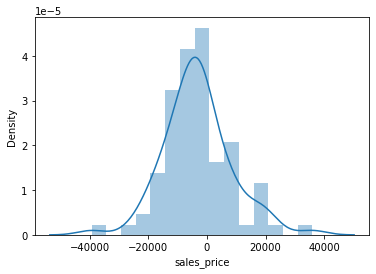

In [76]:
sns.distplot(y_test-lr.predict(X_test))

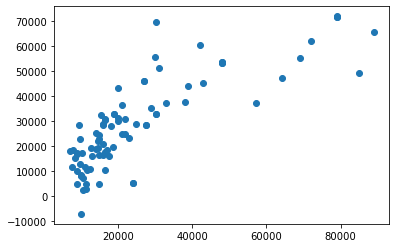

In [77]:
plt.scatter(y_test,lr.predict(X_test))

### FINDING ERRORS MAE, MSE, RMSE 

In [78]:
predictions = lr.predict(X_test)
from sklearn import metrics
print('MAE:', metrics.mean_absolute_error(y_test, predictions))
print('MSE:', metrics.mean_squared_error(y_test, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))

MAE: 9087.51211604798
MSE: 142435754.3310975
RMSE: 11934.645127991762


In [79]:
lr.predict([[1,107,0,0,1,256,4,6.5,3,1,4250,4.7,500,0.2,40]])

array([59320.58993445])